# Notebook to generate the patterns into a numpy file for easy access

In [21]:
import h5py
from scipy.ndimage import zoom
import numpy as np
import matplotlib.pyplot as plt

In [11]:
f = h5py.File("/home/clewis/repos/holo-nbs/data/rb26_20240111_datastruct_pt2.mat", "r")

In [12]:
list(f['data'].keys())

['chan_spk',
 'cue',
 'cue_rec_time',
 'cue_trial_time',
 'depth_spk',
 'field_id',
 'field_size',
 'full_field',
 'laser',
 'laser_rec_time',
 'laser_trial_time',
 'pattern_fill',
 'pattern_id',
 'pattern_xy',
 'rates_laser',
 'spikes_raw_laser',
 'totTime',
 'trial_start',
 'z_rates_laser',
 'znorm_rates_laser']

In [16]:
reshape_size = 13

In [19]:
pattern_ids = list(np.unique(f['data']['pattern_id']))
interp_patterns = list()
for p_id in pattern_ids:
    ix = np.where(f['data']['pattern_id'] == p_id)[1][0].astype(np.int32)
    pattern = np.zeros((f['data']['pattern_xy'][0][ix].astype(np.int32), f['data']['pattern_xy'][1][ix].astype(np.int32)))
    # use the pattern fill to set elements to one
    object_ref = f['data']['pattern_fill'][ix][0]
    for x, y in zip(f[object_ref][0], f[object_ref][1]):
        pattern[x.astype(np.int32)-1, y.astype(np.int32)-1] = 1

    #all_patterns.append(pattern)

    pattern = zoom(pattern, (reshape_size / pattern.shape[0], reshape_size / pattern.shape[1]), order=0)

    interp_patterns.append(pattern)

In [20]:
interp_patterns[0].shape

(13, 13)

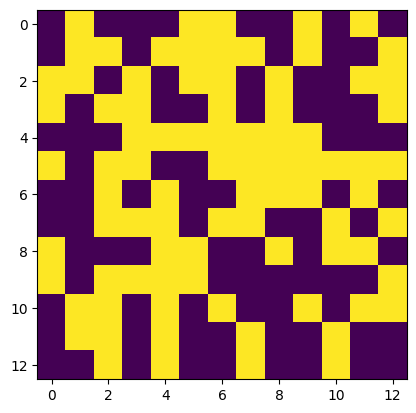

In [24]:
plt.imshow(interp_patterns[5])

In [25]:
a = np.array(interp_patterns)
a.shape

(29, 13, 13)

In [26]:
np.save("/home/clewis/repos/realSpike/real_spike/utils/patterns.npy", a)

In [27]:
a[0].shape

(13, 13)